In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

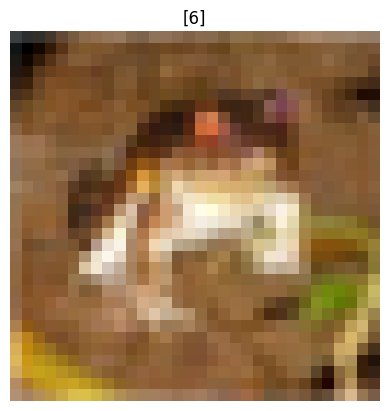

In [5]:
plt.imshow(x_train[0],cmap='gray')
plt.title(str(y_train[0]))
plt.axis('off')

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

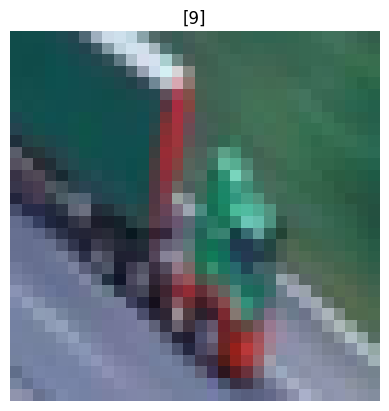

In [6]:
plt.imshow(x_train[50],cmap='gray')
plt.title(str(y_train[50]))
plt.axis('off')

In [7]:
x_train[0].shape

(32, 32, 3)

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
model1 = Sequential([
    Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model1.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

model1.summary()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       144,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,842 (565.79 KB)

 Trainable params: 144,842 (565.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model1.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.4
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.3833 - loss: 1.7359 - val_accuracy: 0.5307 - val_loss: 1.3651
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.5657 - loss: 1.2535 - val_accuracy: 0.5462 - val_loss: 1.3072
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.6093 - loss: 1.1362 - val_accuracy: 0.5788 - val_loss: 1.2258
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.6314 - loss: 1.0689 - val_accuracy: 0.5871 - val_loss: 1.2052
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.6544 - loss: 1.0120 - val_accuracy: 0.5997 - val_loss: 1.1766
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.6709 - loss: 0.9652 - val_accuracy: 0.6017 - val_loss: 1.1587
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.6896 - loss: 0.9110 - val_accuracy: 0.6060 - val_loss: 1.1476
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.7037 - loss: 0.8732 - 